In [2]:
#------ Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import calendar
import urllib3
from datetime import datetime
import locale
locale.setlocale(locale.LC_ALL, 'German')


'German_Germany.1252'

In [3]:
#------ Importing the datasets

# Years 2014 ~ 2017
dataset_d = {}
dataset_m = {}
month_list = ["janeiro", "fevereiro", "marco", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]
month_list_abr = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
errors = []

current_year = 2017
for year in range(2014, current_year + 1):
    for month in range(1, 13):
        for day in range(1, calendar.monthrange(year, month)[1] + 1):
            year_str = str(year)
            month_str = str(month)
            day_str = str(day)
            
            month_str = month_str.zfill(2)
            day_str = day_str.zfill(2)
            date_str = year_str + month_str + day_str
            
            if year <= 2014 and month < 10: # Before this date, the links doesn't have /before acesso_a_informacao
                url = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Passag-{}.xls".format(year_str, month_list[month - 1], date_str))
            else:
                url = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Passag-{}.xls".format(year_str, month_list[month - 1], date_str))
            http = urllib3.PoolManager()
            r = http.request('GET', url)
            
            if r.status < 400:
                print ("url from {} exists. Saving...".format(month_list_abr[month - 1] + "/" + day_str + "/" + year_str))
                dataset_d[date_str] = pd.read_excel(url)
                last_day= day
            else:
                print ("Dia {} não encontrado".format(month_list_abr[month - 1] + "/" + day_str + "/" + year_str))
                print (url)
                errors.append(url)
                if year == current_year:
                    break

        if year == 2014 and month <= 12: #Before this date, the links doesn't have /before acesso_a_informacao
            if year == 2014 and month == 4:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Pass_Transp_{}.xlsx".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            elif year == 2014 and month == 10 or month == 11:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            elif year == 2014 and month == 12:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xlsx".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            else:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))   
        else:
            url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
        
        http = urllib3.PoolManager()
        r = http.request('GET', url_total)
        
        if r.status < 400:
            print ("url from Total {} exists. Saving...".format(month_list_abr[month - 1] + "/" + year_str))
            dataset_m[year_str + month_str] = pd.read_excel(url_total)
            last_month = month
        else:
            print ("Mês Total {} não encontrado".format(month_list_abr[month - 1] + "/" + year_str))
            print (url_total)
            errors.append(url_total)
            if year == current_year:
                break


url from Jan/01/2014 exists. Saving...
url from Jan/02/2014 exists. Saving...
url from Jan/03/2014 exists. Saving...
url from Jan/04/2014 exists. Saving...
url from Jan/05/2014 exists. Saving...
url from Jan/06/2014 exists. Saving...
url from Jan/07/2014 exists. Saving...
url from Jan/08/2014 exists. Saving...
url from Jan/09/2014 exists. Saving...
url from Jan/10/2014 exists. Saving...
url from Jan/11/2014 exists. Saving...
url from Jan/12/2014 exists. Saving...
url from Jan/13/2014 exists. Saving...
url from Jan/14/2014 exists. Saving...
url from Jan/15/2014 exists. Saving...
url from Jan/16/2014 exists. Saving...
url from Jan/17/2014 exists. Saving...
url from Jan/18/2014 exists. Saving...
url from Jan/19/2014 exists. Saving...
url from Jan/20/2014 exists. Saving...
url from Jan/21/2014 exists. Saving...
url from Jan/22/2014 exists. Saving...
url from Jan/23/2014 exists. Saving...
url from Jan/24/2014 exists. Saving...
url from Jan/25/2014 exists. Saving...
url from Jan/26/2014 exis

url from Jul/24/2014 exists. Saving...
url from Jul/25/2014 exists. Saving...
url from Jul/26/2014 exists. Saving...
url from Jul/27/2014 exists. Saving...
url from Jul/28/2014 exists. Saving...
url from Jul/29/2014 exists. Saving...
url from Jul/30/2014 exists. Saving...
url from Jul/31/2014 exists. Saving...
url from Total Jul/2014 exists. Saving...
url from Ago/01/2014 exists. Saving...
url from Ago/02/2014 exists. Saving...
url from Ago/03/2014 exists. Saving...
url from Ago/04/2014 exists. Saving...
url from Ago/05/2014 exists. Saving...
url from Ago/06/2014 exists. Saving...
url from Ago/07/2014 exists. Saving...
url from Ago/08/2014 exists. Saving...
url from Ago/09/2014 exists. Saving...
url from Ago/10/2014 exists. Saving...
url from Ago/11/2014 exists. Saving...
url from Ago/12/2014 exists. Saving...
url from Ago/13/2014 exists. Saving...
url from Ago/14/2014 exists. Saving...
url from Ago/15/2014 exists. Saving...
url from Ago/16/2014 exists. Saving...
url from Ago/17/2014 e

url from Fev/12/2015 exists. Saving...
url from Fev/13/2015 exists. Saving...
url from Fev/14/2015 exists. Saving...
url from Fev/15/2015 exists. Saving...
url from Fev/16/2015 exists. Saving...
url from Fev/17/2015 exists. Saving...
url from Fev/18/2015 exists. Saving...
url from Fev/19/2015 exists. Saving...
url from Fev/20/2015 exists. Saving...
url from Fev/21/2015 exists. Saving...
url from Fev/22/2015 exists. Saving...
url from Fev/23/2015 exists. Saving...
url from Fev/24/2015 exists. Saving...
url from Fev/25/2015 exists. Saving...
url from Fev/26/2015 exists. Saving...
url from Fev/27/2015 exists. Saving...
url from Fev/28/2015 exists. Saving...
url from Total Fev/2015 exists. Saving...
url from Mar/01/2015 exists. Saving...
url from Mar/02/2015 exists. Saving...
url from Mar/03/2015 exists. Saving...
url from Mar/04/2015 exists. Saving...
url from Mar/05/2015 exists. Saving...
url from Mar/06/2015 exists. Saving...
url from Mar/07/2015 exists. Saving...
url from Mar/08/2015 e

url from Set/03/2015 exists. Saving...
url from Set/04/2015 exists. Saving...
url from Set/05/2015 exists. Saving...
url from Set/06/2015 exists. Saving...
url from Set/07/2015 exists. Saving...
url from Set/08/2015 exists. Saving...
url from Set/09/2015 exists. Saving...
url from Set/10/2015 exists. Saving...
url from Set/11/2015 exists. Saving...
url from Set/12/2015 exists. Saving...
url from Set/13/2015 exists. Saving...
url from Set/14/2015 exists. Saving...
url from Set/15/2015 exists. Saving...
url from Set/16/2015 exists. Saving...
url from Set/17/2015 exists. Saving...
url from Set/18/2015 exists. Saving...
url from Set/19/2015 exists. Saving...
url from Set/20/2015 exists. Saving...
url from Set/21/2015 exists. Saving...
url from Set/22/2015 exists. Saving...
url from Set/23/2015 exists. Saving...
url from Set/24/2015 exists. Saving...
url from Set/25/2015 exists. Saving...
url from Set/26/2015 exists. Saving...
url from Set/27/2015 exists. Saving...
url from Set/28/2015 exis

url from Mar/25/2016 exists. Saving...
url from Mar/26/2016 exists. Saving...
url from Mar/27/2016 exists. Saving...
url from Mar/28/2016 exists. Saving...
url from Mar/29/2016 exists. Saving...
url from Mar/30/2016 exists. Saving...
url from Mar/31/2016 exists. Saving...
url from Total Mar/2016 exists. Saving...
url from Abr/01/2016 exists. Saving...
url from Abr/02/2016 exists. Saving...
url from Abr/03/2016 exists. Saving...
url from Abr/04/2016 exists. Saving...
url from Abr/05/2016 exists. Saving...
url from Abr/06/2016 exists. Saving...
url from Abr/07/2016 exists. Saving...
url from Abr/08/2016 exists. Saving...
url from Abr/09/2016 exists. Saving...
url from Abr/10/2016 exists. Saving...
url from Abr/11/2016 exists. Saving...
url from Abr/12/2016 exists. Saving...
url from Abr/13/2016 exists. Saving...
url from Abr/14/2016 exists. Saving...
url from Abr/15/2016 exists. Saving...
url from Abr/16/2016 exists. Saving...
url from Abr/17/2016 exists. Saving...
url from Abr/18/2016 e

url from Out/14/2016 exists. Saving...
url from Out/15/2016 exists. Saving...
url from Out/16/2016 exists. Saving...
url from Out/17/2016 exists. Saving...
url from Out/18/2016 exists. Saving...
url from Out/19/2016 exists. Saving...
url from Out/20/2016 exists. Saving...
url from Out/21/2016 exists. Saving...
url from Out/22/2016 exists. Saving...
url from Out/23/2016 exists. Saving...
url from Out/24/2016 exists. Saving...
url from Out/25/2016 exists. Saving...
url from Out/26/2016 exists. Saving...
url from Out/27/2016 exists. Saving...
url from Out/28/2016 exists. Saving...
url from Out/29/2016 exists. Saving...
url from Out/30/2016 exists. Saving...
url from Out/31/2016 exists. Saving...
url from Total Out/2016 exists. Saving...
url from Nov/01/2016 exists. Saving...
url from Nov/02/2016 exists. Saving...
url from Nov/03/2016 exists. Saving...
url from Nov/04/2016 exists. Saving...
url from Nov/05/2016 exists. Saving...
url from Nov/06/2016 exists. Saving...
url from Nov/07/2016 e

In [4]:
#------ Verifying Numbers
   
# Let's check if the sum of the days of month hits with the worksheet's total
import time

total = {}
total_paying = {}
total_integration = {}
total_free_passengers = {}
total_free_students = {}

xTicks = []

ytotal = []
ytotal_paying = []
ytotal_integration = []
ytotal_free_passengers = []
ytotal_free_students = []

for year in range(2014, current_year + 1):
    for month in range(1, 13):
        
        if year == current_year and month == last_month:
            break

        total_month = 0
        total_paying_month = 0
        total_integration_month = 0
        total_free_passengers_month = 0
        total_free_students_month = 0
        
        for day in range(1, calendar.monthrange(year, month)[1] + 1):
            year_str = str(year)
            month_str = str(month)
            day_str = str(day)
            month_str = month_str.zfill(2)
            day_str = day_str.zfill(2)
            date_str = year_str + month_str + day_str
            
            total_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -1 ].sum() + total_month
            
            if time.strptime(date_str, "%Y%m%d") >= time.strptime("20150409", "%Y%m%d"): 
                 total_paying_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -5 ].sum() + total_paying_month
                 total_integration_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -4 ].sum() + total_integration_month
                 total_free_passengers_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -3 ].sum() + total_free_passengers_month
                 total_free_students_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -2 ].sum() + total_free_students_month
            else:            
                 total_paying_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -4 ].sum() + total_paying_month
                 total_integration_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -3 ].sum() + total_integration_month
                 total_free_passengers_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -2 ].sum() + total_free_passengers_month
        
            empresa_today = dataset_d[date_str].groupby(by=["EMPRESA"])[dataset_d[date_str].columns.values[-1]].sum()
            tipo_today = dataset_d[date_str].groupby(by=["TIPO"])[dataset_d[date_str].columns.values[-1]].sum()
            area_today = dataset_d[date_str].groupby(by=["AREA"])[dataset_d[date_str].columns.values[-1]].sum()
            linha_today = dataset_d[date_str].iloc[:, [1, 2, 3, 4, -1]]
            
            if year == 2014 and month == 1 and day == 1: 
                empresa = empresa_today
                tipo = tipo_today
                area = area_today
                linha = linha_today
            else: 
                empresa = pd.concat([empresa_today, empresa], axis=1).fillna(0).sum(axis=1)
                tipo = pd.concat([tipo_today, tipo], axis=1).fillna(0).sum(axis=1)
                area = pd.concat([area_today, area], axis=1).fillna(0).sum(axis=1)
                linha_today.columns.values[-1] = "PASSAGEIROS"
                linha.columns.values[-1] = "PASSAGEIROS"
                linha = pd.concat([linha_today, linha], axis=0).fillna(0)
                linha = linha.groupby(by=["TIPO", "AREA", "EMPRESA", "LINHA"])[linha.columns.values[-1]].sum()
                linha = linha.reset_index()
                
                #20141203 começam a ter linhas sem nada mas com quantidade de passageiros
                
        total[year_str+month_str] = int(total_month)
        total_paying[year_str+month_str] = int(total_paying_month)
        total_integration[year_str+month_str] = int(total_integration_month)
        total_free_passengers[year_str+month_str] = int(total_free_passengers_month)
        total_free_students[year_str+month_str] = int(total_free_students_month)
        
        locale.format('%.2d', dataset_m[year_str + month_str].iloc[:,dataset_m[year_str + month_str].shape[1] -1].sum(), True)
        
        print ("Para o Mês de {} de {}, somando-se dia a dia chegamos em {} passageiros.".format(month_list[month - 1].title(), year, locale.format('%.2d', total[year_str+month_str], True) ))
        print ("Na planilha consolidada no Site da SPTrans o valor fornecido foi de {} passageiros".format(locale.format('%.2d', dataset_m[year_str + month_str].iloc[:,dataset_m[year_str + month_str].shape[1] -1].sum(), True)))
        print ("Diferença de {} passageiros".format( locale.format('%.2d', total[year_str+month_str] - dataset_m[year_str + month_str].iloc[:,dataset_m[year_str + month_str].shape[1] -1 ].sum(), True) ))
        print ("")
        
        xTicks.append(month_list_abr[month - 1].title() + " " + year_str) # for plot
        
        ytotal.append(total_month/10**6)
        ytotal_paying.append(total_paying_month/10**6)
        ytotal_integration.append(total_integration_month/10**6)
        ytotal_free_passengers.append(total_free_passengers_month/10**6)
        ytotal_free_students.append(total_free_students_month/10**6)
    

Para o Mês de Janeiro de 2014, somando-se dia a dia chegamos em 225.130.349 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 225.130.349 passageiros
Diferença de 00 passageiros

Para o Mês de Fevereiro de 2014, somando-se dia a dia chegamos em 234.365.831 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 234.365.831 passageiros
Diferença de 00 passageiros

Para o Mês de Marco de 2014, somando-se dia a dia chegamos em 241.120.083 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 241.120.083 passageiros
Diferença de 00 passageiros

Para o Mês de Abril de 2014, somando-se dia a dia chegamos em 243.628.063 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 243.628.063 passageiros
Diferença de 00 passageiros

Para o Mês de Maio de 2014, somando-se dia a dia chegamos em 246.013.104 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 246.013.

In [5]:
#------ Creating a Index Renaming the Columns and Sorting 
empresa = empresa.reset_index()
empresa.columns = ["EMPRESA", "PASSAGEIROS"]
empresa = empresa.sort_values("PASSAGEIROS", ascending=False)

tipo = tipo.reset_index()
tipo.columns = ["TIPO", "PASSAGEIROS"]
tipo = tipo.sort_values("PASSAGEIROS", ascending=False)

area = area.reset_index()
area.columns = ["AREA", "PASSAGEIROS"]
area = area.sort_values("PASSAGEIROS", ascending=False)

linha = linha.drop(linha.index[[0]]) #Deleting the first line with error values 
linha = linha.sort_values("PASSAGEIROS", ascending=False) #Sorting max => min
linha = linha.reset_index() # Creating a new index
linha = linha.drop(linha.columns[[0]], axis=1) #Deleting the the column create before (this way in can have a index in order =) )

linha_linha = linha.groupby(by=["LINHA"])[linha.columns.values[-1]].sum()
linha_linha = linha_linha.reset_index()

for index, row in linha_linha.iterrows():
    valor = row[0].split(' ')[0]
    linha_linha.set_value(index,'LINHANUM', valor) # Let's strip the LINHA COLUMN to get only the code of line and create a n ew column


In [11]:
# Using the GTFS 
shapes = pd.read_csv('gtfs/shapes.txt', sep=",")
routes = pd.read_csv('gtfs/routes.txt', sep=",")
trips = pd.read_csv('gtfs/trips.txt', sep=",")

i = 0
for index, row in shapes.iterrows():
    if row[3] == 1 and i == 1: # The last value with total distance made by the line 
         route_id = trips.loc[trips['shape_id'] == shape_id]['route_id'].values # Searching the Code of line in trips dataset 
         route_id = route_id[0] # Picking the value in the 
         route_id = list(route_id) #Spliting the Code Line in list
         del route_id[4] # Deleting the "-" because in linha_linha dataset there isn't
         route_id = "".join(route_id) # Reagrouping :)
         index_place = linha_linha.loc[linha_linha['LINHANUM'] == route_id].index.values # Picking the index value to that line
         linha_linha.set_value(index_place,'DISTTRAJETO', valor_dist) # Adding the total distance in the linha_linha dataset
         i = 1
    elif row[3] == 1 and i == 0:
         i = i + 1
    shape_id = row[0]
    valor_dist = row[4]

for index, row in linha_linha.iterrows():
    if np.isnan(row[3]) == False:
        print ("Na linha {} temos um uma relação de {} Passageiros por km ".format(row[0], "{0:.2f}".format(1000*row[1]/row[3]) ))


Na linha 101210 - JD MONTE BELO/TERM JD BRITANIA temos um uma relação de 206397.02 Passageiros por km 
Na linha 101510 - CHAC MARIA TRINDADE/T JD BRITA temos um uma relação de 48380.01 Passageiros por km 
Na linha 101610 - CEMITERIO DO HORTO/CENTER NORT temos um uma relação de 1213331.52 Passageiros por km 
Na linha 101710 - PERUS/VILA IORIO temos um uma relação de 954603.81 Passageiros por km 
Na linha 101810 - VILA ROSA/SANTANA temos um uma relação de 721793.37 Passageiros por km 
Na linha 102110 - COHAB BRASILANDI/TERM PIRITUBA temos um uma relação de 164193.54 Passageiros por km 
Na linha 102410 - JD CAROMBE/CONEX PETRONIO PORT temos um uma relação de 1323839.23 Passageiros por km 
Na linha 102510 - JARDIM CAROMBÉ/LAPA temos um uma relação de 431723.56 Passageiros por km 
Na linha 102610 - VILA IARA/CONEX PETRON PORTELA temos um uma relação de 288082.88 Passageiros por km 
Na linha 103410 - MORRO GRANDE/CONEXAO VILA LORI temos um uma relação de 1241327.41 Passageiros por km 
Na lin

Na linha 245110 - VL S FRANCISCO/PQ D PEDRO II temos um uma relação de 199756.99 Passageiros por km 
Na linha 246010 - CEM.SAUDADE/T PQ.D.PEDRO II temos um uma relação de 861633.79 Passageiros por km 
Na linha 246310 - BURGO PAULISTA-TERM.ARICANDUVA temos um uma relação de 134939.49 Passageiros por km 
Na linha 250110 - JD VERONIA-PQUE D PEDRO temos um uma relação de 216596.46 Passageiros por km 
Na linha 252210 - VILA PROGRESSO-SHOP.ARICANDUVA temos um uma relação de 269598.74 Passageiros por km 
Na linha 252310 - VILA PROGRESSO-T PRINC ISABEL temos um uma relação de 705784.02 Passageiros por km 
Na linha 253F10 - TERM.A.E.CARVALHO-T.SAO MATEUS temos um uma relação de 186518.57 Passageiros por km 
Na linha 255110 - TERM.A.E.CARVALHO-TERM.D.PEDRO temos um uma relação de 219852.38 Passageiros por km 
Na linha 255210 - VILA MARA-TERM.D.PEDRO II temos um uma relação de 614883.81 Passageiros por km 
Na linha 255241 - JD S MARTINHO/T PQ D PEDRO II temos um uma relação de 29198.19 Passageiro

In [60]:
#------ Plotting Total Passengers vs. Month
def totalpassengersvsdate():
    plt.figure(figsize=(16,8))
    x = list(range(0, len(ytotal) ))
    plt.xticks(x, xTicks)
    plt.xticks(range(len(ytotal)), xTicks, rotation=60) # writes strings with 45 degree angle
    colors = []
    for i in range(0, len(ytotal)):
        if i < 12:
            colors.append('#F44336')
        elif i >= 12 and i < 24:
            colors.append('#FFC107')
        elif i >= 24 and i < 36:
            colors.append('#4A148C')
        else:
            colors.append('#48A51A')
    plt.bar(x,ytotal, color=colors)
    plt.xlabel("Data")
    plt.ylabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.gcf().subplots_adjust(bottom=0.25, left=0.1)
   # plt.tight_layout()
    ano2014 = mpatches.Patch(color='#F44336', label='2014')
    ano2015 = mpatches.Patch(color='#FFC107', label='2015')
    ano2016 = mpatches.Patch(color='#4A148C', label='2016')
    ano2017 = mpatches.Patch(color='#48A51A', label='2017')
    plt.legend(handles=[ano2014,ano2015,ano2016,ano2017], 
               loc='upper center', 
               bbox_to_anchor=(0.5, -0.25),
               fancybox=False, 
               shadow=False, 
               ncol=4) 
    plt.show()

#------ Plotting Paying Passenger and Integration Passenger and Free Passengers and Free Pass Students vs Month
def typepassengervsdate():
    raw_data = {'Date': xTicks,
            'Passageiros Pagantes': ytotal_paying,
            'Passageiros com Integração': ytotal_integration,
            'Passageiros com Gratuidade': ytotal_free_passengers,
            'Passageiros Estudantes com Gratuidade': ytotal_free_students}
    df = pd.DataFrame(raw_data, columns = ['Date', 'Passageiros Pagantes','Passageiros com Integração', 'Passageiros com Gratuidade', 'Passageiros Estudantes com Gratuidade'])
    
    # Create the general and the "subplots" i.e. the bars
    f, ax1 = plt.subplots(1, figsize=(16,8))
    
    # Set the bar width
    bar_width = 0.8
    
    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(df['Passageiros Pagantes']))]
    
    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = list(range(1, len(xTicks) + 1))
    
    # Create a bar plot
    ax1.bar(bar_l,
            df['Passageiros Pagantes'],
            width=bar_width,
            label='Passageiros Pagantes',
            color='#F44336')
    
    # Create a bar plot
    ax1.bar(bar_l,
            df['Passageiros com Integração'],
            width=bar_width,
            bottom=df['Passageiros Pagantes'],
            label='Passageiros com Integração',
            color='#4A148C')
    
    # Create a bar plot
    ax1.bar(bar_l,
            df['Passageiros com Gratuidade'],
            width=bar_width,
            bottom=[i+j for i,j in zip(df['Passageiros Pagantes'],df['Passageiros com Integração'])],
            label='Passageiros com Gratuidade',
            color='#48A51A')
    
    # Create a bar plot
    ax1.bar(bar_l,
            df['Passageiros Estudantes com Gratuidade'],
            width=bar_width,
            bottom=[i+j+k for i,j,k in zip(df['Passageiros Pagantes'],df['Passageiros com Integração'], df['Passageiros com Gratuidade'])],
            label='Passageiros Estudantes com Gratuidade',
            color='#009688')
    
    # Set the x ticks with names
    plt.xticks(tick_pos, df['Date'], rotation = 60)
    
    # To label don't cut off 
    plt.gcf().subplots_adjust(bottom=0.25, left=0.1)
    
    # Set the label and legends
    ax1.set_ylabel("Total de Passageiros por Categoria \n (em milhões de Pasageiros)")
    ax1.set_xlabel("Data")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
              fancybox=True, shadow=False, ncol=4)
    plt.show()


#------ Check which companies carry the most

def mostusedcompanies(n_empresas):
    if n_empresas > len(empresa["EMPRESA"].tolist()):
        n_empresas = len(empresa["EMPRESA"].tolist())
    
    x = list(range(0, n_empresas))
    plt.figure(figsize=(16,8))
    plt.xticks(x, empresa["EMPRESA"].tolist())
    plt.xticks(range(0, n_empresas), empresa["EMPRESA"].tolist()[:n_empresas], rotation=90) 
    plt.bar(x, (empresa["PASSAGEIROS"]/10**6).tolist()[:n_empresas])
    plt.gcf().subplots_adjust(left=0.3)
    plt.tight_layout()
    plt.xlabel("Empresa")
    plt.ylabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    
    plt.show()
    
    print (empresa)

#------ Check concession vs. permission
def mostusedtype():
    x = list(range(0, len(tipo["TIPO"].tolist())))
    plt.figure(figsize=(16,8))
    plt.xticks(x, tipo["TIPO"].tolist())
    plt.xticks(range(len(tipo["TIPO"].tolist())), tipo["TIPO"].tolist())
    plt.bar(x, (tipo["PASSAGEIROS"]/10**6).tolist(), color="#009688")
    plt.gcf().subplots_adjust(left=0.3)
    plt.tight_layout()
    plt.xlabel("Tipo")
    plt.ylabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.show()
    
    print (tipo)

#------ Verify usage by Area
def mostusedareas():
    x = list(range(0, len(area["AREA"].tolist())))
    plt.figure(figsize=(16,8))
    plt.xticks(x, area["AREA"].tolist())
    plt.xticks(range(len(area["AREA"].tolist())), area["AREA"].tolist())
    plt.bar(x, (area["PASSAGEIROS"]/10**6).tolist(), color="#009688")
    plt.gcf().subplots_adjust(left=0.3)
    plt.tight_layout()
    plt.xlabel("Área")
    plt.ylabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.show()
    
    print (area)

#------ n most used Lines
def mostusedlines(n_linhas):
    if n_linhas > len(linha["LINHA"].tolist()):
        n_linhas = len(linha["LINHA"].tolist())
    
    plt.figure(figsize=(16,8))
    colors = []
    for i in range(0, n_linhas):
        if linha.ix[i,1] == "AREA 1":
            colors.append('#EC407A')
        elif linha.ix[i,1] == "AREA 2":
            colors.append('#9C27B0')
        elif linha.ix[i,1] == "AREA 3":
            colors.append('#2196F3')
        elif linha.ix[i,1] == "AREA 4":
            colors.append('#009688')
        elif linha.ix[i,1] == "AREA 5":
            colors.append('#8BC34A')
        elif linha.ix[i,1] == "AREA 6":
            colors.append('#FFC107')
        elif linha.ix[i,1] == "AREA 7":
            colors.append('#FF5722')
    plt.barh(range(0, n_linhas), (linha["PASSAGEIROS"]/10**6)[:n_linhas], align='center', color=colors)
    plt.yticks(range(0, n_linhas),linha["LINHA"][:n_linhas], rotation = 0)
    plt.gcf().subplots_adjust(left=0.3)
    plt.xlabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.ylabel("Linha")
    AREA1 = mpatches.Patch(color='#EC407A', label='AREA 1')
    AREA2 = mpatches.Patch(color='#9C27B0', label='AREA 2')
    AREA3 = mpatches.Patch(color='#2196F3', label='AREA 3')
    AREA4 = mpatches.Patch(color='#009688', label='AREA 4')
    AREA5 = mpatches.Patch(color='#8BC34A', label='AREA 5')
    AREA6 = mpatches.Patch(color='#FFC107', label='AREA 6')
    AREA7 = mpatches.Patch(color='#FF5722', label='AREA 7')
    plt.legend(handles=[AREA1,AREA2,AREA3,AREA4,AREA5,AREA6,AREA7], loc=1)
    plt.show()
        
    print (linha.head(n_linhas))

#------ Check which n lines are most commonly used by AREA
def mostusedlinesperarea(n_linhas, area):
    if n_linhas > len(linha["LINHA"].tolist()):
        n_linhas = len(linha["LINHA"].tolist())
    
    linha_area = linha.loc[(linha["AREA"] == area)]
    
    plt.figure(figsize=(16,8))
    plt.barh(range(0, n_linhas), (linha_area["PASSAGEIROS"]/10**6)[:n_linhas], align='center', color="#009688")
    plt.yticks(range(0, n_linhas), linha_area["LINHA"][:n_linhas], rotation = 0)
    plt.gcf().subplots_adjust(left=0.3)
    plt.xlabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.ylabel("Linha")
    plt.title("As {} linhas mais usadas na {}".format(n_linhas, area.title() ))
    plt.show()
        
    print (linha.head(n_linhas))
    
    
#------Check which n lines are most commonly used by COMPANY

def mostusedlinespercompanie(n_linhas, companie):
    if n_linhas > len(linha["LINHA"].tolist()):
        n_linhas = len(linha["LINHA"].tolist())
    
    linha_comp = linha.loc[(linha["EMPRESA"] == companie)]
    
    plt.figure(figsize=(16,8))
    plt.barh(range(0, n_linhas), (linha_comp["PASSAGEIROS"]/10**6)[:n_linhas], align='center', color="#009688")
    plt.yticks(range(0, n_linhas), linha_comp["LINHA"][:n_linhas], rotation = 0)
    plt.gcf().subplots_adjust(left=0.3)
    plt.xlabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')
    plt.ylabel("Linha")
    plt.title("As {} linhas mais usadas pela Empresa {}".format(n_linhas, companie.title() ))
    plt.show()
        
    print (linha.head(n_linhas))

#------ Plotting the Normal

def normal():
    positivos = linha_linha[linha_linha.DISTTRAJETO > 0].DISTTRAJETO
    aleatorios = pd.Series(np.random.randn(100*len(positivos)), name='normal')
    plt.figure(figsize=(16,8))
    plt.hist(aleatorios, bins=75, width=0.1)
    plt.show()

#------ Plotting the Histogram of Distances

def histdistance ():
    positivos = linha_linha[linha_linha.DISTTRAJETO > 0].DISTTRAJETO
    plt.figure(figsize=(16,8))
    plt.hist(positivos, bins=95, edgecolor = "black", color="#009688")
    plt.axvline(linha_linha["DISTTRAJETO"].mean(), color='b', linestyle='dashed', linewidth=2)
    plt.annotate('Média de {} km por trajeto'.format("{0:.2f}".format(linha_linha["DISTTRAJETO"].mean()/1000)), 
                xy=(linha_linha["DISTTRAJETO"].mean(), 0), 
                xytext=(linha_linha["DISTTRAJETO"].mean(), -5.0), 
                arrowprops = dict(facecolor='black', shrink=0.05))
    plt.show()


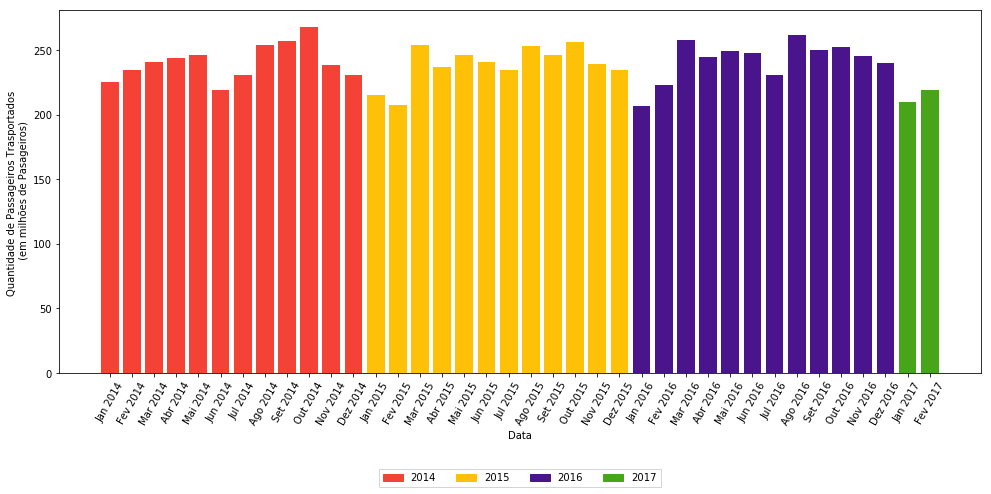

In [50]:
#------ Calling the Plots :)

totalpassengersvsdate()

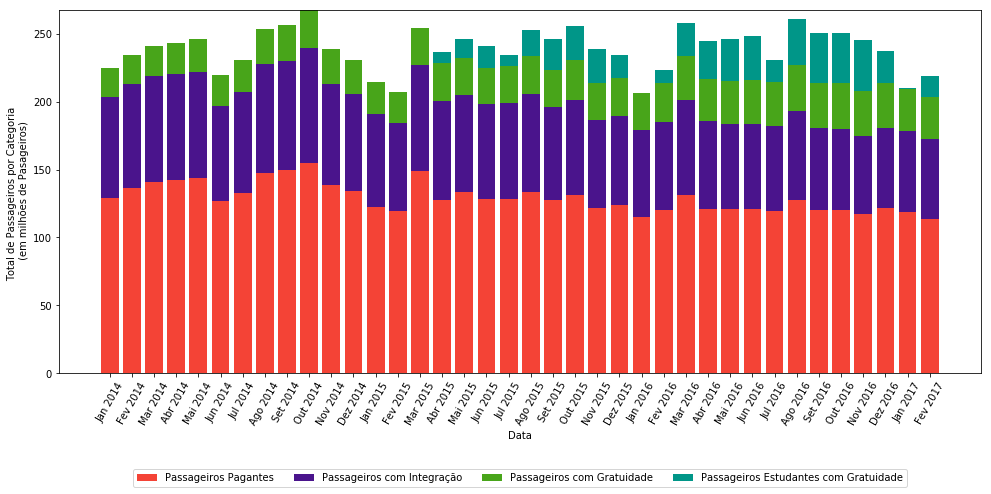

In [51]:
typepassengervsdate()

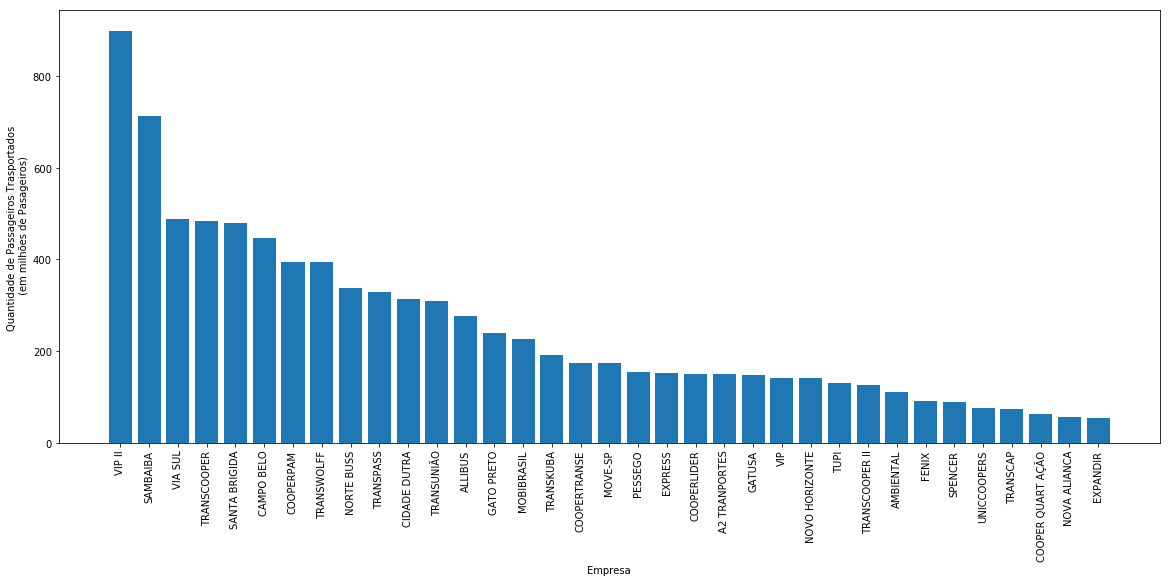

                     EMPRESA  PASSAGEIROS
28                    VIP II  899265380.0
16                  SAMBAIBA  713866278.0
26                   VIA SUL  489009487.0
41               TRANSCOOPER  484127183.0
18             SANTA BRIGIDA  478355456.0
4                 CAMPO BELO  446670542.0
35                 COOPERPAM  394609901.0
24                TRANSWOLFF  394313264.0
13                NORTE BUSS  338475050.0
22                 TRANSPASS  328210240.0
5               CIDADE DUTRA  314604959.0
23                TRANSUNIÃO  308405970.0
2                    ALLIBUS  277548669.0
8                 GATO PRETO  239939655.0
11                MOBIBRASIL  226229478.0
21                 TRANSKUBA  191667758.0
36              COOPERTRANSE  174417131.0
12                   MOVE-SP  174118446.0
14                   PESSEGO  154897029.0
7                    EXPRESS  151970525.0
34               COOPERLIDER  151020690.0
0              A2 TRANPORTES  150473095.0
9                     GATUSA  1470

In [52]:
mostusedcompanies(35) # Number of companies to plot

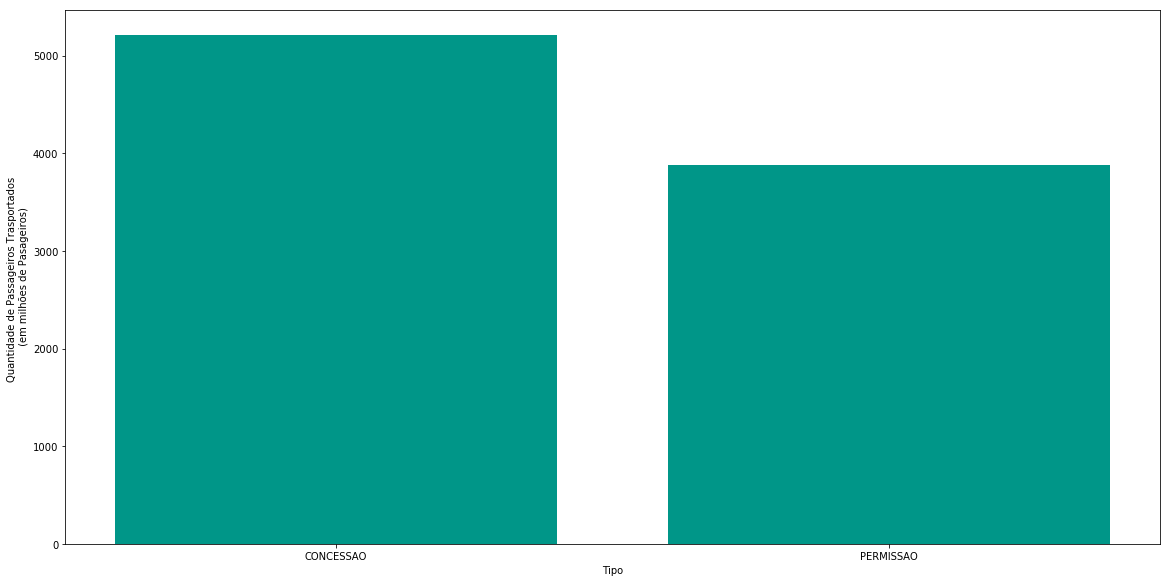

        TIPO   PASSAGEIROS
0  CONCESSAO  5.208255e+09
1  PERMISSAO  3.876389e+09


In [53]:
mostusedtype()

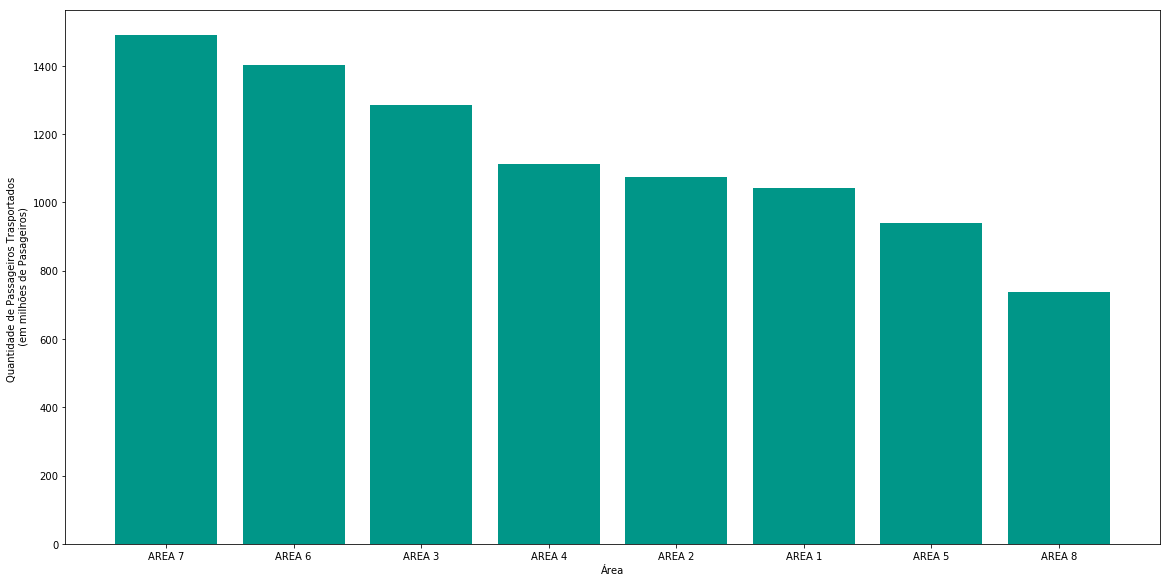

     AREA   PASSAGEIROS
6  AREA 7  1.489272e+09
5  AREA 6  1.403485e+09
2  AREA 3  1.285783e+09
3  AREA 4  1.113236e+09
1  AREA 2  1.075277e+09
0  AREA 1  1.042468e+09
4  AREA 5  9.385032e+08
7  AREA 8  7.366193e+08


In [54]:
mostusedareas()

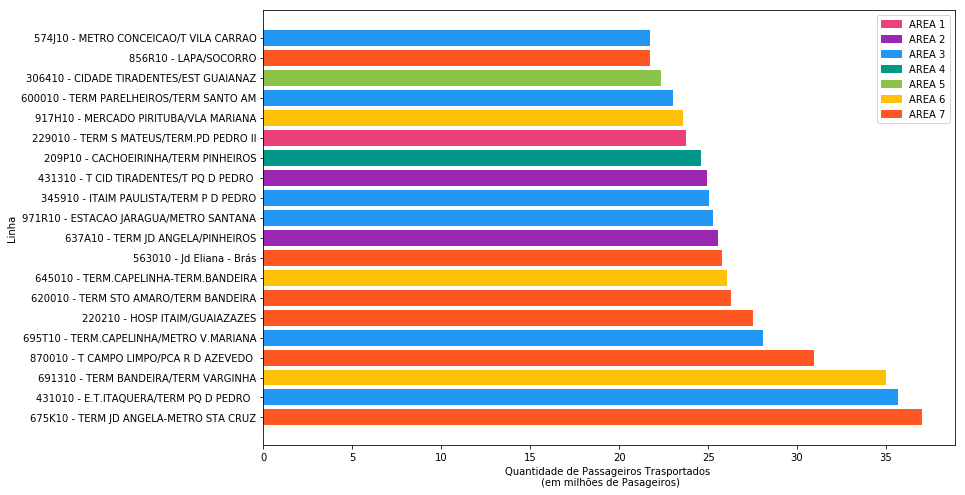

         TIPO    AREA        EMPRESA                                    LINHA  \
0   CONCESSAO  AREA 7         VIP II   675K10 - TERM JD ANGELA-METRO STA CRUZ   
1   CONCESSAO  AREA 3         VIP II  431010 - E.T.ITAQUERA/TERM PQ D PEDRO     
2   CONCESSAO  AREA 6   CIDADE DUTRA     691310 - TERM BANDEIRA/TERM VARGINHA   
3   CONCESSAO  AREA 8      TRANSPASS  870010 - T CAMPO LIMPO/PCA R D AZEVEDO    
4   CONCESSAO  AREA 7      TRANSKUBA  695T10 - TERM.CAPELINHA/METRO V.MARIANA   
5   PERMISSAO  AREA 3     TRANSUNIÃO           220210 - HOSP ITAIM/GUAIAZAZES   
6   CONCESSAO  AREA 7         GATUSA    620010 - TERM STO AMARO/TERM BANDEIRA   
7   CONCESSAO  AREA 7     CAMPO BELO    645010 - TERM.CAPELINHA-TERM.BANDEIRA   
8   CONCESSAO  AREA 6   CIDADE DUTRA                563010 - Jd Eliana - Brás   
9   CONCESSAO  AREA 7         VIP II        637A10 - TERM JD ANGELA/PINHEIROS   
10  CONCESSAO  AREA 2       SAMBAIBA   971R10 - ESTACAO JARAGUA/METRO SANTANA   
11  CONCESSAO  AREA 3       

In [55]:
mostusedlines(20) # Number of lines to plot

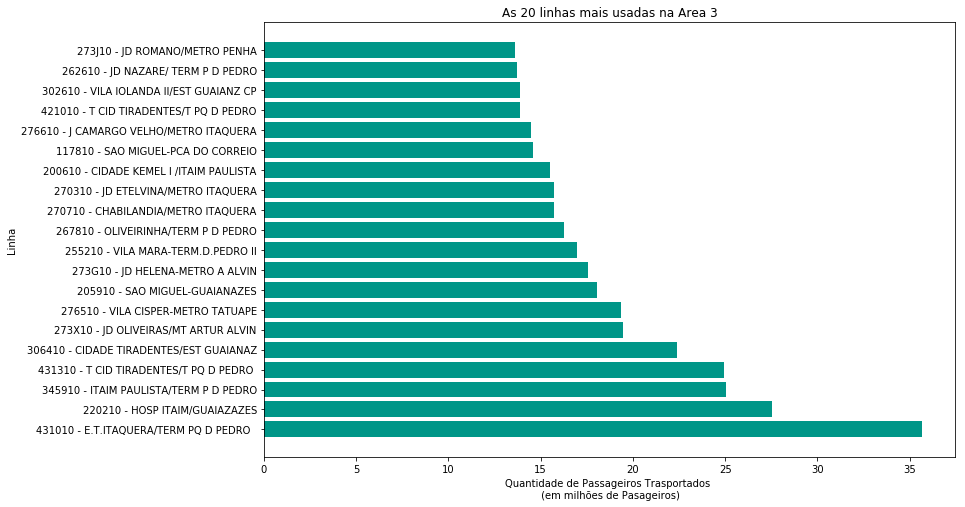

         TIPO    AREA        EMPRESA                                    LINHA  \
0   CONCESSAO  AREA 7         VIP II   675K10 - TERM JD ANGELA-METRO STA CRUZ   
1   CONCESSAO  AREA 3         VIP II  431010 - E.T.ITAQUERA/TERM PQ D PEDRO     
2   CONCESSAO  AREA 6   CIDADE DUTRA     691310 - TERM BANDEIRA/TERM VARGINHA   
3   CONCESSAO  AREA 8      TRANSPASS  870010 - T CAMPO LIMPO/PCA R D AZEVEDO    
4   CONCESSAO  AREA 7      TRANSKUBA  695T10 - TERM.CAPELINHA/METRO V.MARIANA   
5   PERMISSAO  AREA 3     TRANSUNIÃO           220210 - HOSP ITAIM/GUAIAZAZES   
6   CONCESSAO  AREA 7         GATUSA    620010 - TERM STO AMARO/TERM BANDEIRA   
7   CONCESSAO  AREA 7     CAMPO BELO    645010 - TERM.CAPELINHA-TERM.BANDEIRA   
8   CONCESSAO  AREA 6   CIDADE DUTRA                563010 - Jd Eliana - Brás   
9   CONCESSAO  AREA 7         VIP II        637A10 - TERM JD ANGELA/PINHEIROS   
10  CONCESSAO  AREA 2       SAMBAIBA   971R10 - ESTACAO JARAGUA/METRO SANTANA   
11  CONCESSAO  AREA 3       

In [56]:
mostusedlinesperarea(20, "AREA 3") # Number of lines and the area to plot

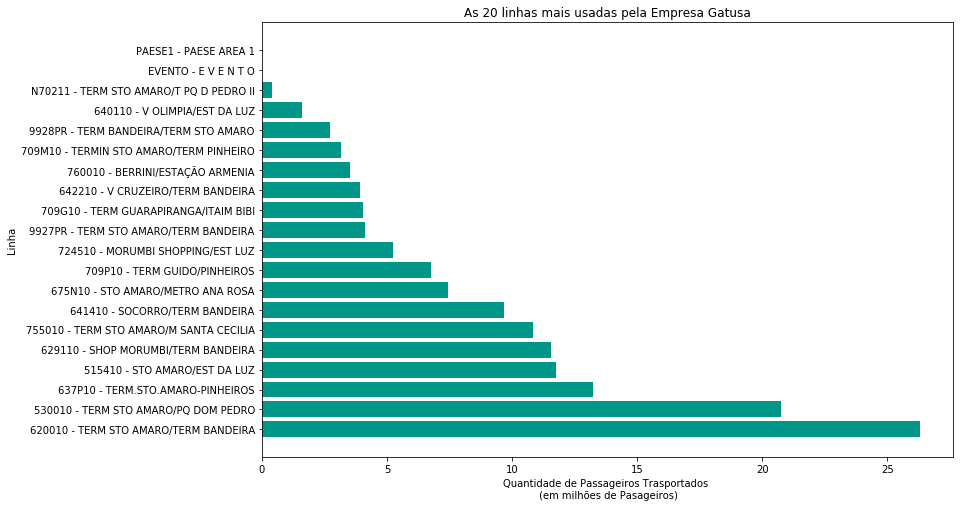

         TIPO    AREA        EMPRESA                                    LINHA  \
0   CONCESSAO  AREA 7         VIP II   675K10 - TERM JD ANGELA-METRO STA CRUZ   
1   CONCESSAO  AREA 3         VIP II  431010 - E.T.ITAQUERA/TERM PQ D PEDRO     
2   CONCESSAO  AREA 6   CIDADE DUTRA     691310 - TERM BANDEIRA/TERM VARGINHA   
3   CONCESSAO  AREA 8      TRANSPASS  870010 - T CAMPO LIMPO/PCA R D AZEVEDO    
4   CONCESSAO  AREA 7      TRANSKUBA  695T10 - TERM.CAPELINHA/METRO V.MARIANA   
5   PERMISSAO  AREA 3     TRANSUNIÃO           220210 - HOSP ITAIM/GUAIAZAZES   
6   CONCESSAO  AREA 7         GATUSA    620010 - TERM STO AMARO/TERM BANDEIRA   
7   CONCESSAO  AREA 7     CAMPO BELO    645010 - TERM.CAPELINHA-TERM.BANDEIRA   
8   CONCESSAO  AREA 6   CIDADE DUTRA                563010 - Jd Eliana - Brás   
9   CONCESSAO  AREA 7         VIP II        637A10 - TERM JD ANGELA/PINHEIROS   
10  CONCESSAO  AREA 2       SAMBAIBA   971R10 - ESTACAO JARAGUA/METRO SANTANA   
11  CONCESSAO  AREA 3       

In [57]:
mostusedlinespercompanie(20, "GATUSA")

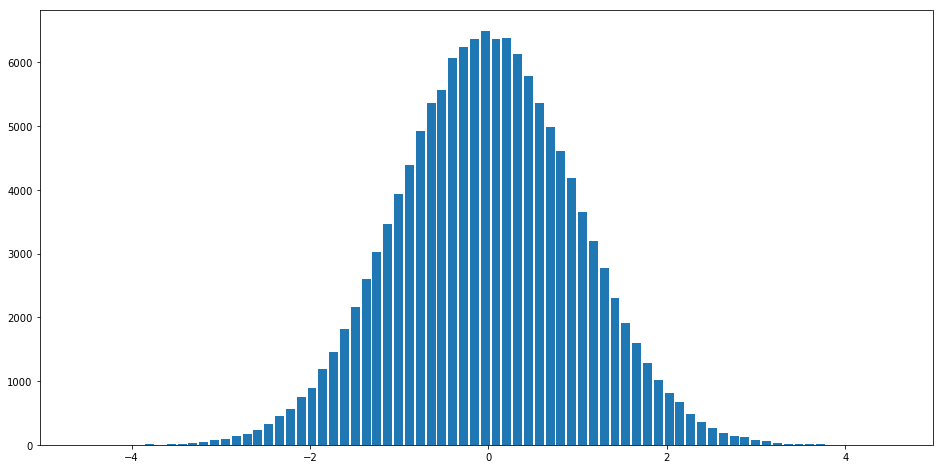

In [58]:
normal()

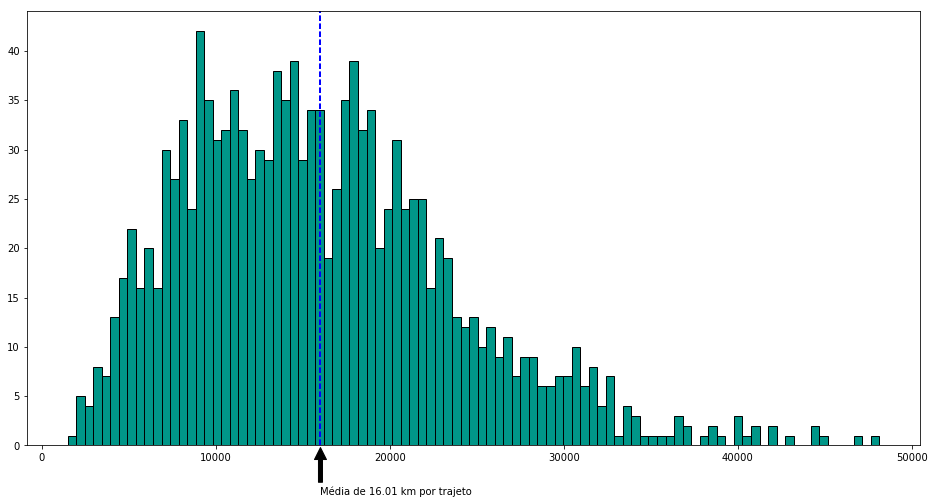

In [61]:
histdistance() 

# Lembra mais uma curva normal com assimetria positiva

In [63]:
#------ Some Statitics

import statistics
print ("Arithmetic mean (average) of data: {}".format(statistics.mean(ytotal)))
print ("Sample standard deviation of data: {}".format(statistics.stdev(ytotal)))

print("Média de {} km por trajeto".format(linha_linha["DISTTRAJETO"].mean()))
print(linha_linha["DISTTRAJETO"].max())
print(linha_linha["DISTTRAJETO"].min())
print(linha_linha["DISTTRAJETO"].std())


Arithmetic mean (average) of data: 239.25495018421054
Sample standard deviation of data: 15.306941238352449
Média de 16008.315216379966 km por trajeto
48117.238
1472.1552
7771.281067989963
